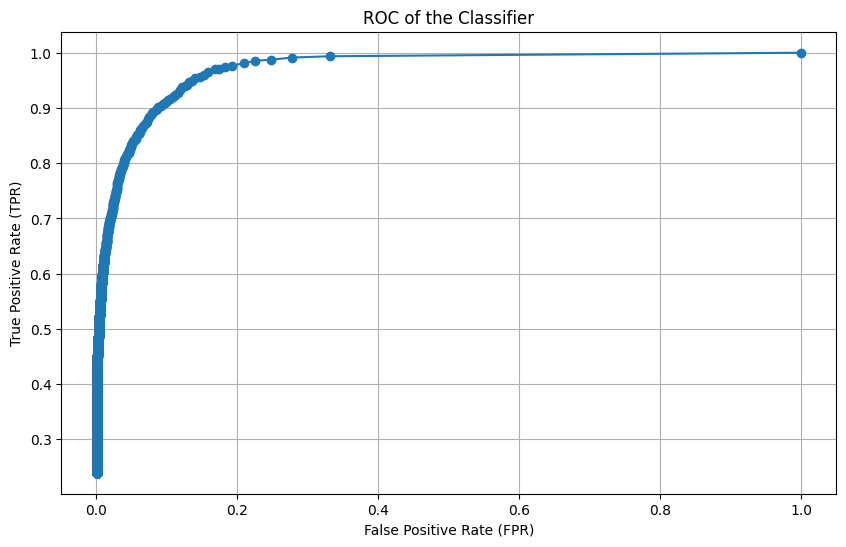

In [49]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Constants
NUM_SAMPLES = 10000
PRIOR_Y0 = 0.7
PRIOR_Y1 = 0.3

# Parameters for Gaussian distributions
mu0 = np.array([-1, 1, -1, 1])
cov0 = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]])

mu1 = np.array([1, 1, 1, 1])
cov1 = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]])

# Generate data
np.random.seed(0)
class_labels = np.random.choice([0, 1], size=NUM_SAMPLES, p=[PRIOR_Y0, PRIOR_Y1])
data = np.array(
    [np.random.multivariate_normal(mu0, cov0) if label == 0 else np.random.multivariate_normal(mu1, cov1) for label
     in class_labels])

# Compute class conditional probabilities
pdf_x_given_y0 = multivariate_normal.pdf(data, mean=mu0, cov=cov0)
pdf_x_given_y1 = multivariate_normal.pdf(data, mean=mu1, cov=cov1)

gamma_values = np.linspace(0, 1000, 20000)
TPRs = []  # True Positive Rate
FPRs = []  # False Positive Rate

# Calculate ROC data points
for gamma in gamma_values:
    # Apply classifier based on current gamma
    decisions = (pdf_x_given_y1 / pdf_x_given_y0) > gamma

    # True positive: Y=1, D=1
    TP = np.sum((decisions == 1) & (class_labels == 1))
    
    # False positive: Y=0, D=1
    FP = np.sum((decisions == 1) & (class_labels == 0))
    
    # True Negative: Y=0, D=0
    TN = np.sum((decisions == 0) & (class_labels == 0))
    
    # False Negative: Y=1, D=0
    FN = np.sum((decisions == 0) & (class_labels == 1))

    # Calculate probabilities
    TPR = TP / np.sum(class_labels == 1)  # P(D=1|Y=1)
    FPR = FP / np.sum(class_labels == 0)  # P(D=1|Y=0)
    TNR = TN / np.sum(class_labels == 0)  # P(D=0|Y=0)
    FNR = FN / np.sum(class_labels == 1)  # P(D=0|Y=1)

    TPRs.append(TPR)
    FPRs.append(FPR)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(FPRs, TPRs, marker='o')
plt.title("ROC of the Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.show()

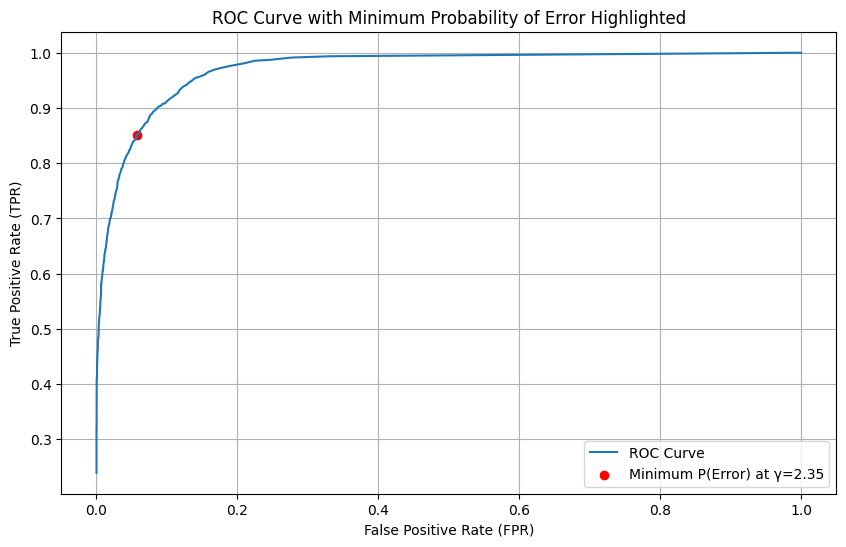

(0.08465626055669649, 2.350117505875294)

In [50]:
# Calculate the minimum probability of error for each gamma
prob_errors = []

for gamma in gamma_values:
    decisions = (pdf_x_given_y1 / pdf_x_given_y0) > gamma
    
    # True positive and False positive
    TP = np.sum((decisions == 1) & (class_labels == 1))
    FP = np.sum((decisions == 1) & (class_labels == 0))
    TN = np.sum((decisions == 0) & (class_labels == 0))
    FN = np.sum((decisions == 0) & (class_labels == 1))
    
    # Probabilities of error
    P_error = (FP / np.sum(class_labels == 0)) * PRIOR_Y0 + (FN / np.sum(class_labels == 1)) * PRIOR_Y1
    prob_errors.append(P_error)

# Minimum probability of error and corresponding gamma
min_prob_error = min(prob_errors)
optimal_index = prob_errors.index(min_prob_error)
optimal_gamma = gamma_values[optimal_index]

# Highlight this point on the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(FPRs, TPRs, label="ROC Curve")
plt.scatter(FPRs[optimal_index], TPRs[optimal_index], color='red', label=f'Minimum P(Error) at γ={optimal_gamma:.2f}')
plt.title("ROC Curve with Minimum Probability of Error Highlighted")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

min_prob_error, optimal_gamma


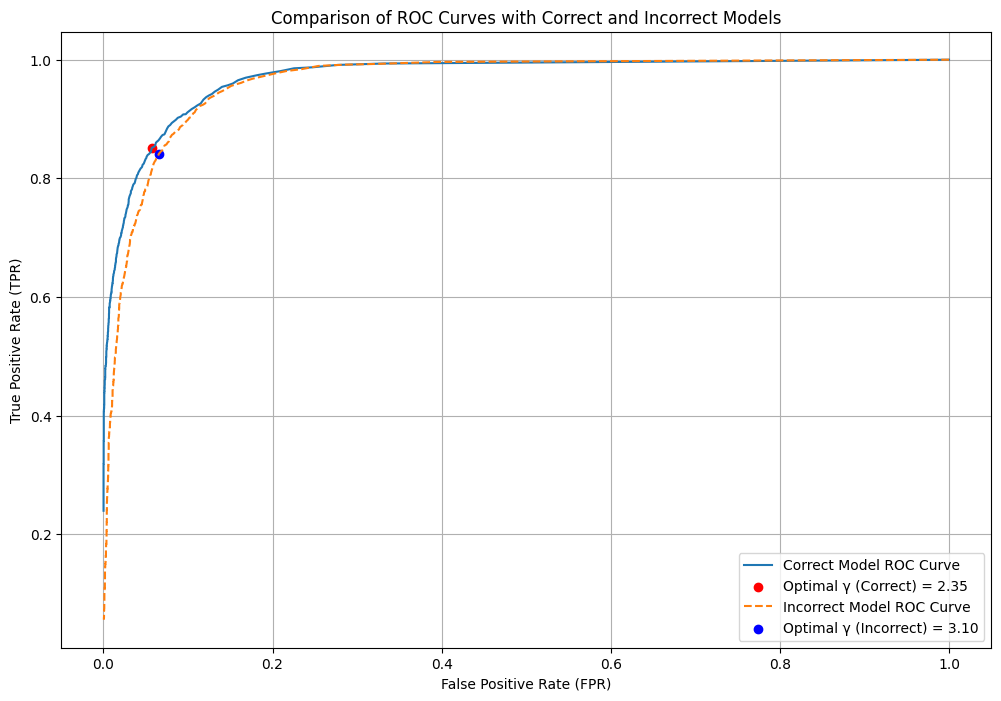

(0.08465626055669649,
 2.350117505875294,
 0.09345873571662205,
 3.100155007750388)

In [51]:
# Incorrect covariance matrices that are diagonal (with diagonal entries equal to true variances)
sigma0_diag = np.diag(np.diag(cov0))
sigma1_diag = np.diag(np.diag(cov1))

# Compute class conditional probabilities with incorrect model assumption
pdf_x_given_y0_diag = multivariate_normal.pdf(data, mean=mu0, cov=sigma0_diag)
pdf_x_given_y1_diag = multivariate_normal.pdf(data, mean=mu1, cov=sigma1_diag)

# Calculate ROC data points for the incorrect model
TPRs_diag = []
FPRs_diag = []
prob_errors_diag = []

for gamma in gamma_values:
    decisions_diag = (pdf_x_given_y1_diag / pdf_x_given_y0_diag) > gamma
    
    # True positive and False positive
    TP_diag = np.sum((decisions_diag == 1) & (class_labels == 1))
    FP_diag = np.sum((decisions_diag == 1) & (class_labels == 0))
    TN_diag = np.sum((decisions_diag == 0) & (class_labels == 0))
    FN_diag = np.sum((decisions_diag == 0) & (class_labels == 1))
    
    # Calculate probabilities
    TPR_diag = TP_diag / np.sum(class_labels == 1)  # P(D=1|Y=1)
    FPR_diag = FP_diag / np.sum(class_labels == 0)  # P(D=1|Y=0)
    P_error_diag = (FP_diag / np.sum(class_labels == 0)) * PRIOR_Y0 + (FN_diag / np.sum(class_labels == 1)) * PRIOR_Y1
    
    TPRs_diag.append(TPR_diag)
    FPRs_diag.append(FPR_diag)
    prob_errors_diag.append(P_error_diag)

# Minimum probability of error and corresponding gamma for incorrect model
min_prob_error_diag = min(prob_errors_diag)
optimal_index_diag = prob_errors_diag.index(min_prob_error_diag)
optimal_gamma_diag = gamma_values[optimal_index_diag]

# Plot ROC curve for both correct and incorrect models
plt.figure(figsize=(12, 8))
plt.plot(FPRs, TPRs, label="Correct Model ROC Curve")
plt.scatter(FPRs[optimal_index], TPRs[optimal_index], color='red', label=f'Optimal γ (Correct) = {optimal_gamma:.2f}')
plt.plot(FPRs_diag, TPRs_diag, label="Incorrect Model ROC Curve", linestyle='--')
plt.scatter(FPRs_diag[optimal_index_diag], TPRs_diag[optimal_index_diag], color='blue', label=f'Optimal γ (Incorrect) = {optimal_gamma_diag:.2f}')
plt.title("Comparison of ROC Curves with Correct and Incorrect Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

(min_prob_error, optimal_gamma, min_prob_error_diag, optimal_gamma_diag)
